In [9]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset 1: Gastrointestinal Lesions in Regular Colonoscopy Data Set

In [2]:
filePath = 'data.txt'

data = np.genfromtxt(filePath, delimiter=',', skip_header=1)

In [3]:
# transpose data to get features in columns and samples in rows
data_transpose = np.transpose(data)
data_list = data_transpose.tolist()

# now let's seperate data into "White Light Frame (WL)" and "NBI Frame (NBI)"
# 1 for WL and 2 for NBI
data_WL, data_NBI = [],[]
for i in range(len(data_list)):
    if data_list[i][1] == 1:
        data_WL.append(data_list[i])
    elif data_list[i][1] == 2:
        data_NBI.append(data_list[i])

# checking if the separation was done correctely
print(False in [row[1]==1 for row in data_WL])  # should be False
print(False in [row[1]==2 for row in data_NBI]) # should be False
print((len(data_WL)+len(data_NBI))==len(data_list)) # should be True

False
False
True


In [4]:
# separating features and targets out of data_WL and data_NBI
fea_WL = [row[2:] for row in data_WL]
class_WL = [row[0] for row in data_WL]

fea_NBI = [row[2:] for row in data_NBI]
class_NBI = [row[0] for row in data_NBI]

---

In [5]:
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix

# X -> features, y -> label
X = np.array(fea_NBI + fea_WL)
y = np.array(class_NBI + class_WL)

# create loocv procedure
cv = LeaveOneOut()

y_true, y_pred = [],[]
fea_importances = []

# enumerate splits
for train_ix, test_ix in cv.split(X):
	
    # split data
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]   
    # fit model
    # model = RandomForestClassifier(random_state=1)
    model = ExtraTreesClassifier(n_estimators=100, random_state=0, criterion='entropy')
    model.fit(X_train, y_train) 
    fea_importances.append(model.feature_importances_)

    # evaluate model
    yhat = model.predict(X_test)
    # store
    y_true.append(y_test[0])
    y_pred.append(yhat[0])

# calculate accuracy
cm1 = confusion_matrix(y_true, y_pred)
print(cm1)
acc1 = accuracy_score(y_true, y_pred)
print('Overall Accuracy: %.3f' % acc1)

[[35  0  7]
 [ 0 20 10]
 [ 6  0 74]]
Overall Accuracy: 0.849


In [6]:
print('Overall Accuracy: %.3f' % acc1)

FP = cm1.sum(axis=0) - np.diag(cm1) 
FN = cm1.sum(axis=1) - np.diag(cm1)
TP = np.diag(cm1)
TN = cm1.sum() - (FP + FN + TP)

print(FP.shape)
print(FN.shape)
print(TP.shape)
print(TN.shape)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

Overall Accuracy: 0.849
(3,)
(3,)
(3,)
(3,)


In [7]:
TNR

array([0.94545455, 1.        , 0.76388889])

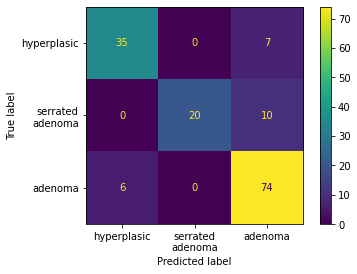

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['hyperplasic','serrated\nadenoma','adenoma'])
disp.plot()

plt.savefig('Lesions_cm.png', bbox_inches ="tight", transparent = True, dpi=600)
plt.show()

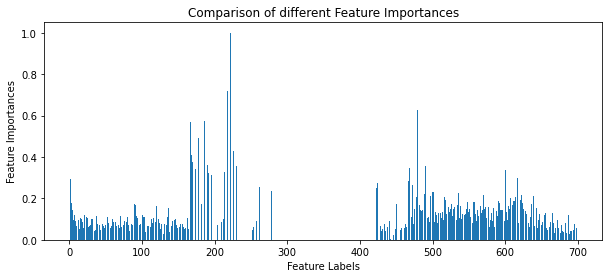

In [12]:
import matplotlib.pyplot as plt

mean_fea_imp = np.mean(np.array(fea_importances), axis=0)
feature_importance_normalized = (mean_fea_imp)/np.max(mean_fea_imp)

# Plotting a Bar Graph to compare the models
plt.figure(figsize=(10,4))
plt.bar(range(1,699), feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')

plt.savefig('Lesions_feature_importance.png', bbox_inches ="tight", transparent = True, dpi=600)
plt.show()

## Dataset 2: LSVT Voice Rehabilitation Data Set

In [13]:
filePath = 'LSVT_voice_rehabilitation.xlsx'

In [14]:
import pandas as pd

xls = pd.ExcelFile(filePath)
df1 = pd.read_excel(xls, 'Data')
df2 = pd.read_excel(xls, 'Binary response')
df3 = pd.read_excel(xls, 'Subject demographics')

In [15]:
fea = df1.to_numpy()
labels = df2.to_numpy()
participants = df3.to_numpy()

In [16]:
# X -> features, y -> label
X = fea
y = np.transpose(labels)[0]

In [17]:
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix

# X -> features, y -> label
X = fea
y = np.transpose(labels)[0]

# create loocv procedure
cv = LeaveOneOut()

y_true, y_pred = [],[]
fea_importances = []

# enumerate splits
for train_ix, test_ix in cv.split(X):
	
    # split data
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]   
    # fit model
    # model = RandomForestClassifier(random_state=1)
    model = ExtraTreesClassifier(n_estimators=100, random_state=0, criterion='entropy')
    model.fit(X_train, y_train) 
    fea_importances.append(model.feature_importances_)

    # evaluate model
    yhat = model.predict(X_test)
    
    # store
    y_true.append(y_test[0])
    y_pred.append(yhat[0])

# calculate accuracy
cm2 = confusion_matrix(y_true, y_pred)
print(cm2)
acc2 = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % acc2)

[[27 15]
 [ 3 81]]
Accuracy: 0.857


In [90]:
print('Accuracy: %.3f' % acc2)

FP = cm2.sum(axis=0) - np.diag(cm2) 
FN = cm2.sum(axis=1) - np.diag(cm2)
TP = np.diag(cm2)
TN = cm2.sum() - (FP + FN + TP)

print(FP.shape)
print(FN.shape)
print(TP.shape)
print(TN.shape)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

Accuracy: 0.857
(2,)
(2,)
(2,)
(2,)


In [18]:
FDR

array([0.14634146, 0.        , 0.18681319])

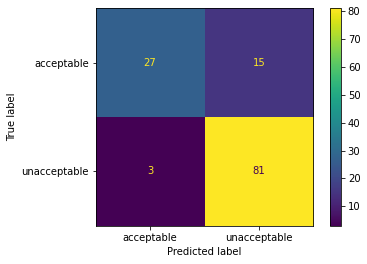

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['acceptable','unacceptable'])
disp.plot()

plt.savefig('Voice_cm.png', bbox_inches ="tight", transparent = True, dpi=600)

plt.show()

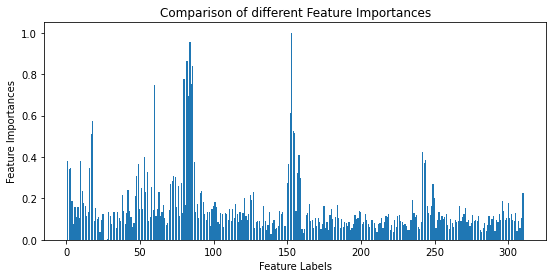

In [20]:
import matplotlib.pyplot as plt

mean_fea_imp = np.mean(np.array(fea_importances), axis=0)
feature_importance_normalized = (mean_fea_imp)/np.max(mean_fea_imp)

# Plotting a Bar Graph to compare the models
plt.figure(figsize=(9,4))
plt.bar(range(1,311), feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')

plt.savefig('Voice_feature_importance.png', bbox_inches ="tight", transparent = True, dpi=600)


plt.show()